# Training **YOLOv11** *Google Collab.*  ✌
- notebook dari **robobflow**, el modif dikit.
- contoh buku TA dari agung https://www.its.ac.id/komputer/wp-content/uploads/sites/28/2018/03/Contoh-Buku-TA.pdf
- YOLOv11 disini **pre trained**, kita tinggal sesuaikan dengan kebutuhan

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


download foto agung

In [2]:
!wget https://raw.githubusercontent.com/AgungHari/AgungHari/main/agunghariphoto.jpg -O /content/agunghariphoto.jpg


--2024-10-10 18:02:47--  https://raw.githubusercontent.com/AgungHari/AgungHari/main/agunghariphoto.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22762 (22K) [image/jpeg]
Saving to: ‘/content/agunghariphoto.jpg’

/content/agungharip 100%[===================>]  22.23K  --.-KB/s    in 0.001s  

2024-10-10 18:02:47 (23.4 MB/s) - ‘/content/agunghariphoto.jpg’ saved [22762/22762]



## Import ultralytics untuk fine tuned model yolo, bisa untuk YOLOv8,v9,v11 dkk
-cek https://github.com/AgungHari/notebooks

In [3]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.3/112.6 GB disk)


## Tes predict pakai model YOLOv11 langsung (belum di training) foto agung

In [4]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='/content/agunghariphoto.jpg' save=True

100% 5.35M/5.35M [00:00<00:00, 68.4MB/s]
Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

image 1/1 /content/agunghariphoto.jpg: 640x448 1 person, 84.4ms
Speed: 16.3ms preprocess, 84.4ms inference, 1633.2ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


nilai di kotak ini adalah confidence score prediksi jumlahnya 0.95, artinya model ini yakin aku adalah person sebanyak 0.95

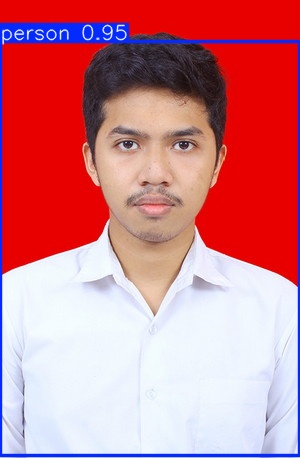

In [5]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/predict/agunghariphoto.jpg', width=600)

## Download dataset dari roboflow
Dataset Agung
- https://app.roboflow.com/hari-vijaya-kusuma/deteksi-manusia-yolov8-dataset/3
- dataset ini berupa anotasi dari gambar manusia. gambar dilabeli dengan 1 kelas berupa manusia.

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

rf = Roboflow(api_key="ew3FOBY4o4fH5jtfkDaB")
project = rf.workspace("hari-vijaya-kusuma").project("deteksi-manusia-yolov8-dataset")
version = project.version(3)
dataset = version.download("yolov11")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Deteksi-Manusia-YoloV8-Dataset-3 in yolov11:: 100%|██████████| 28248/28248 [00:10<00:00, 2610.70it/s]


## Sesuaikan dengan kebutuhan
- jumlah epoch, imgz, batch dkk
- bisa tambahakan batch, optimizer, learning rate, dkk
batch=... optimizer=... lr0

Penjelasan :
- epochs=100: Jumlah epoch yang akan dilalui selama pelatihan.
- imgsz=700: Ukuran gambar yang digunakan untuk pelatihan, semua gambar akan disesuaikan ke ukuran ini.
- batch=16: Ukuran batch yang digunakan untuk pelatihan, yaitu 16 gambar per batch.
- optimizer=Adam: Menggunakan algoritma optimasi Adam.
- device=0: Pelatihan menggunakan GPU 0 (jika tersedia). Jika tidak, bisa menggunakan device=cpu untuk CPU.
- cache=True: Mengaktifkan caching dataset di memori untuk mempercepat pelatihan.
- lr0=0.01: Learning rate awal untuk optimasi.
- momentum=0.937: Parameter momentum untuk optimizer SGD.
- weight_decay=0.0005: Regularisasi L2 untuk mencegah overfitting.
- amp=True: Mengaktifkan pelatihan dengan Mixed Precision untuk mempercepat pelatihan dan mengurangi penggunaan memori.
- patience=100: Early stopping akan diaktifkan jika tidak ada peningkatan dalam 100 epoch.
- resume=True: Melanjutkan pelatihan dari checkpoint terakhir yang disimpan.


In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11n.pt data={dataset.location}/data.yaml epochs=5 imgsz=640 plots=True #batch=16 optimizer=Adam device=0 cache=True lr0=0.01 momentum=0.937 weight_decay=0.0005 amp=True patience=100 resume=True

/content
Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/datasets/Deteksi-Manusia-YoloV8-Dataset-3/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

In [8]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/datasets/Deteksi-Manusia-YoloV8-Dataset-3/valid/labels.cache... 1024 images, 0 backgrounds, 0 corrupt: 100% 1024/1024 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 64/64 [00:12<00:00,  5.28it/s]
                   all       1024       2290      0.781      0.686      0.769      0.468
Speed: 0.7ms preprocess, 3.8ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Menampilkan confusion matrix, grafik mAP, loss dkk

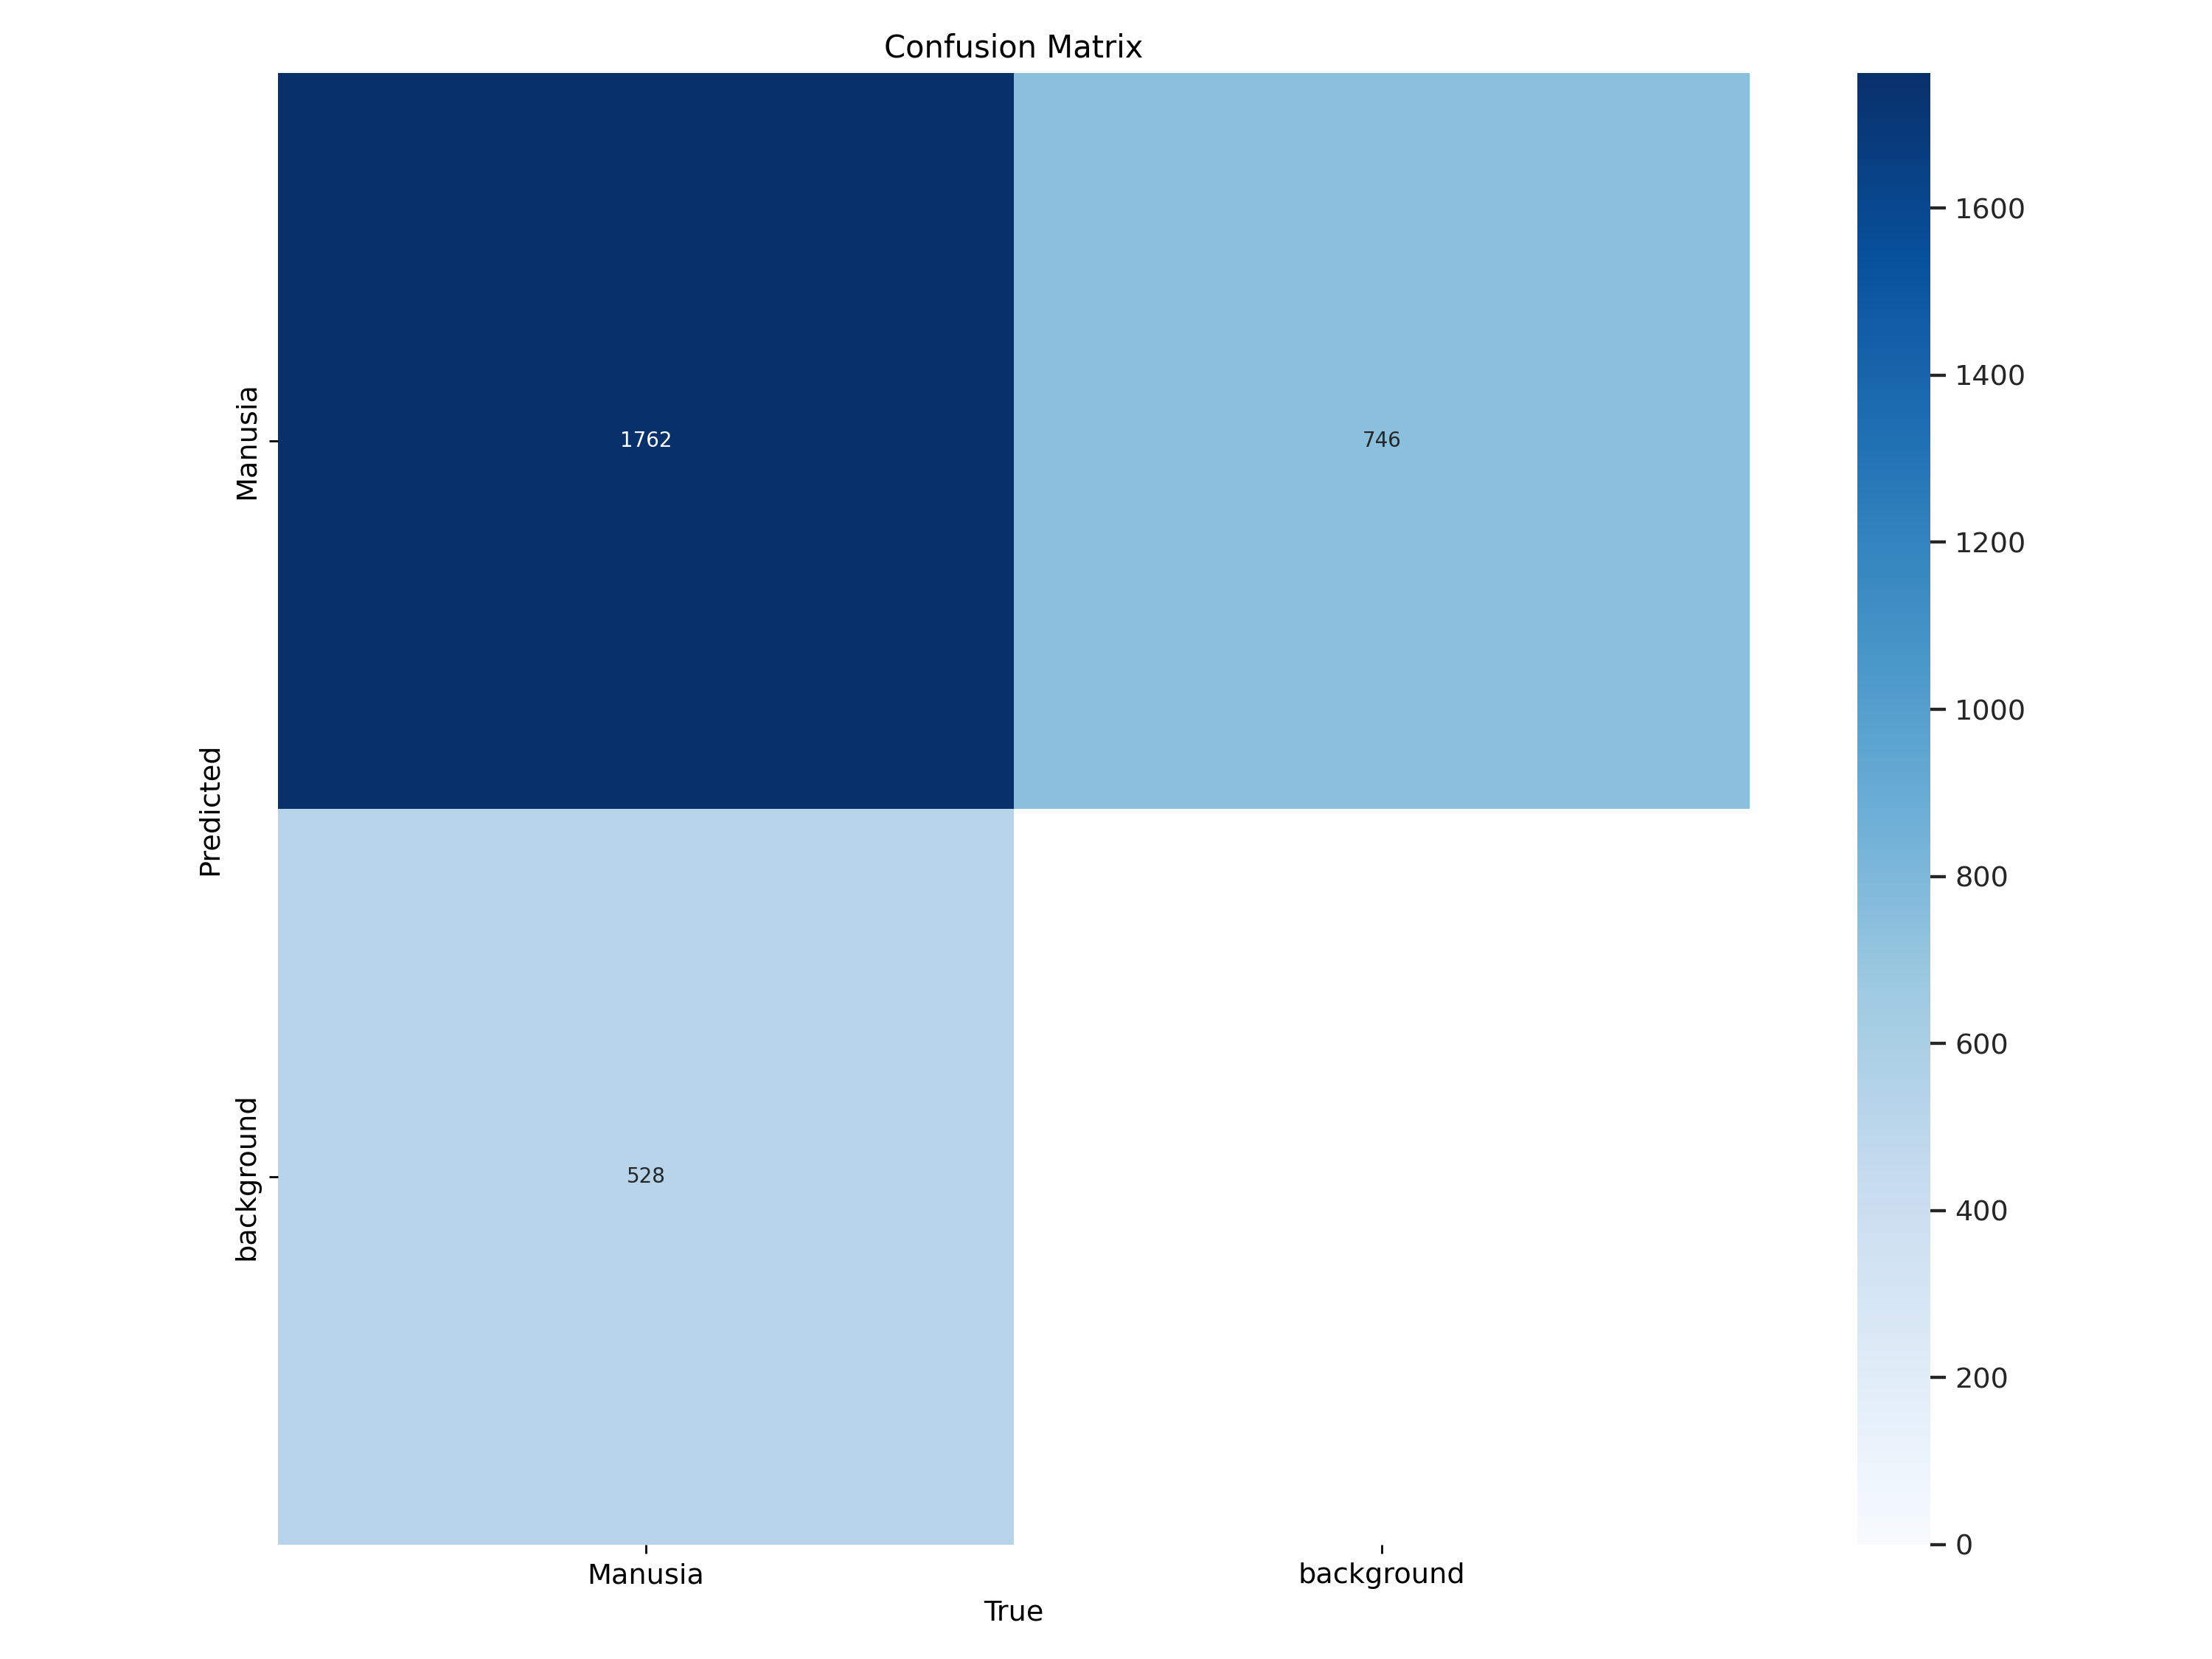

In [9]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/val/confusion_matrix.png', width=600)

collab yang kugunakan bukan pro version sehingga training jadi sangat lama. sehingga untuk contoh ini hanya 5 epoch

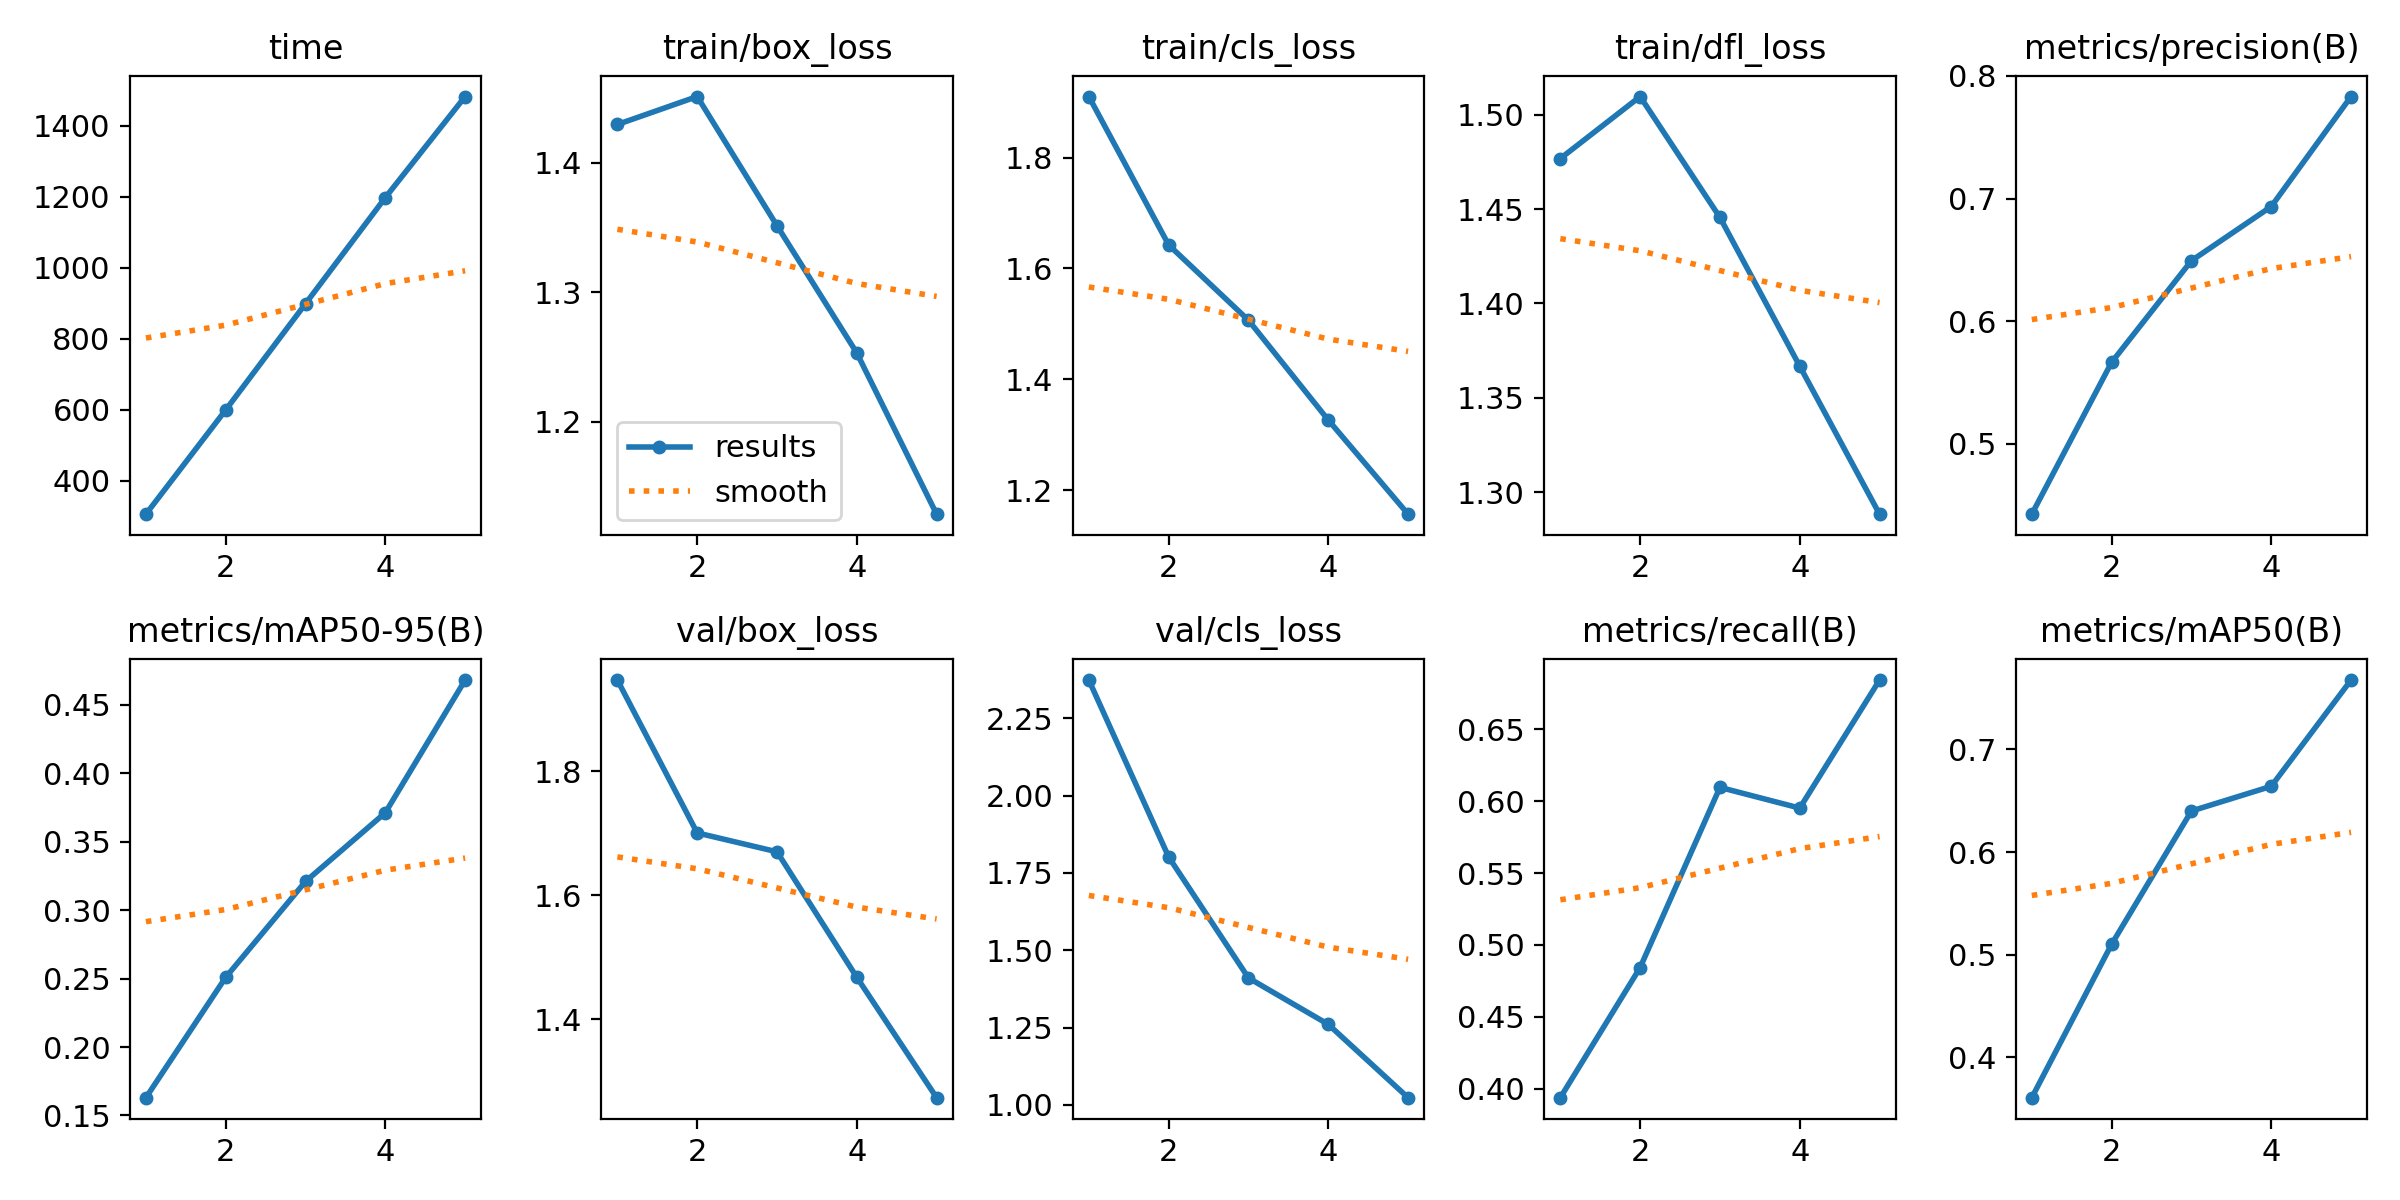

In [11]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

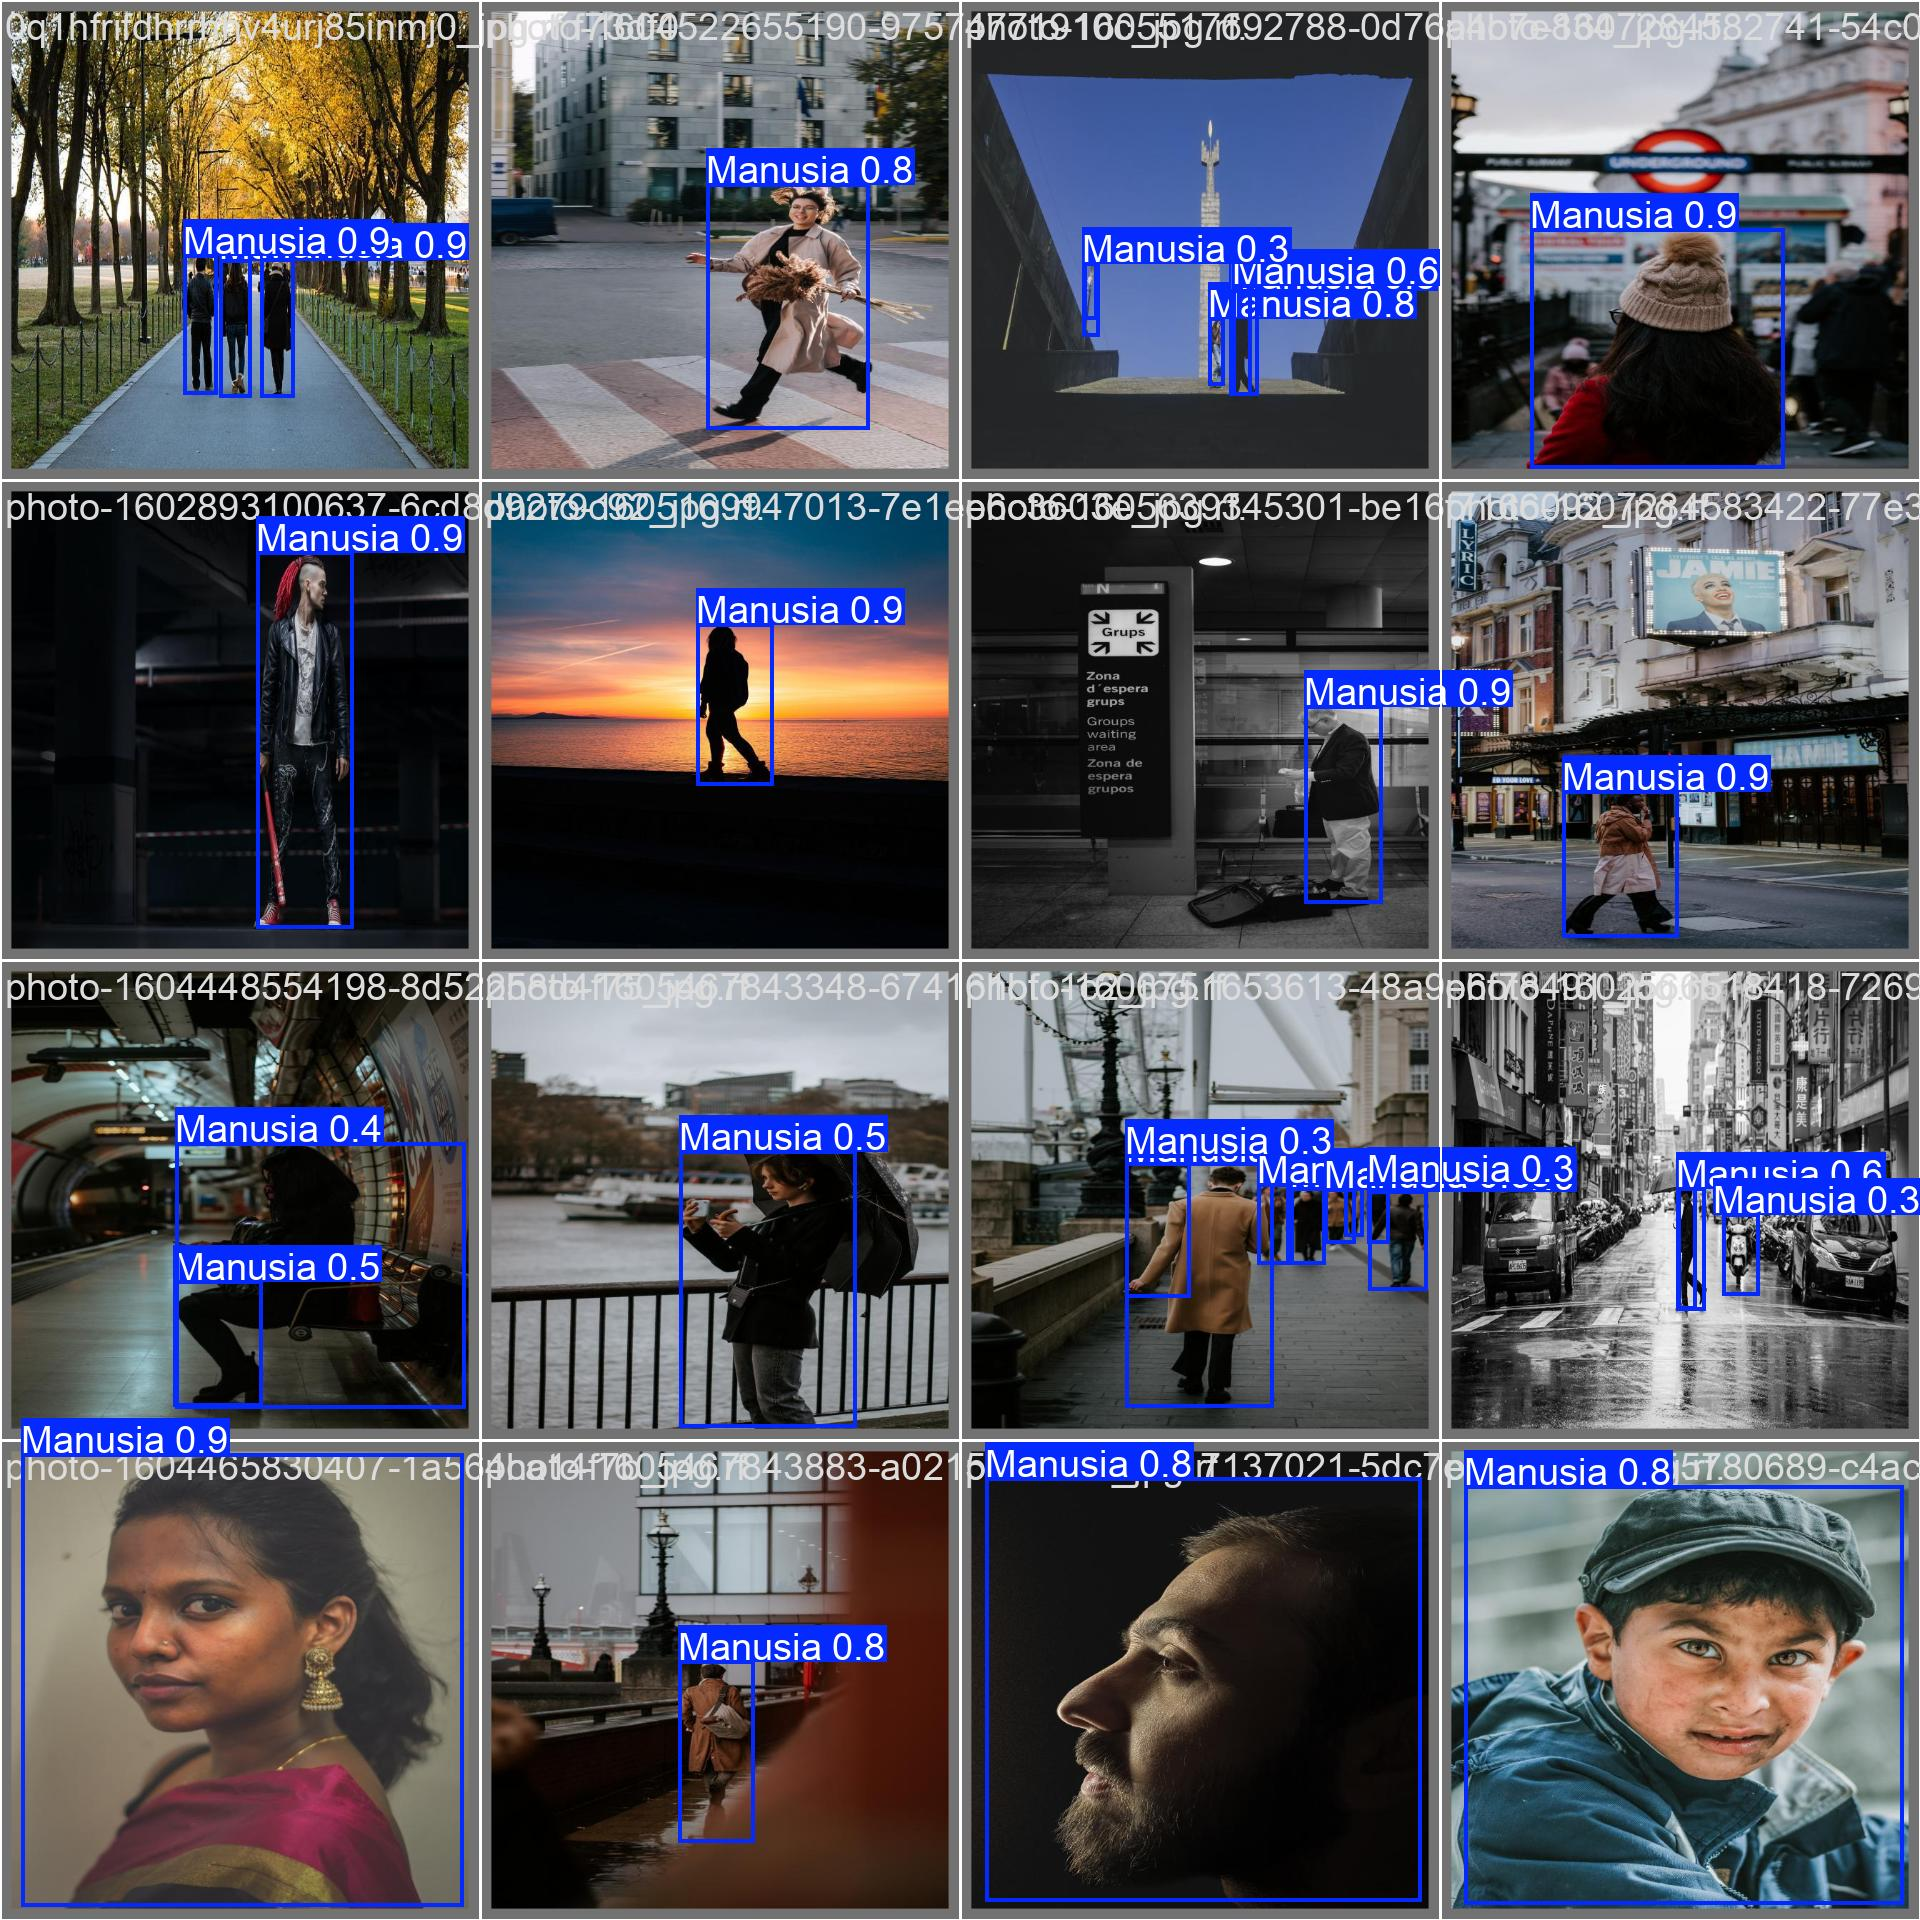

In [12]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/val/val_batch0_pred.jpg', width=600)

untuk tes inference, nilai di kotak itu confidence score dari model, seberapa yakin model bahwa kamu kelas yang diprediksi (dalam konteks training model ini seberapa yakin model bahwa kamu **manusia**)

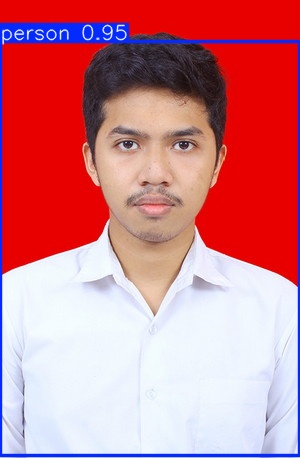

In [13]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")